In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

In [8]:
import tensorflow.keras.utils as utils #분류분석시 원핫인코딩 시
from tensorflow.keras.models import Sequential # 모델생성 시
from tensorflow.keras.layers import Dense, Activation
import numpy as np

## 머신러닝 : 데이터에서 법칙성을 추출.
   - 다양한 분야에서 응용 : 글씨인식, 문장분류, 주식예측, 질병진단, 얼굴식별, 음성인식
   
   ```
   지도학습(독립=입력변수, 종속=타겟변수) 
           - 회귀분석(타겟변수가 연속형) vs 분류분석(multi, binary)
   비지도학습 - 군집화
   강화학습
   1. 데이터 셋 생성
       원본 데이터 및 시뮬레이션을 통해 데이터 생성
   2. 전처리
       훈련셋(학습셋), 검증셋, 시험셋(테스트셋)
       머신러닝 및 딥러닝 모델에서 학습 및 평가를 할 수 있도록 포맷 변환
   3. 모델 구성
       시퀀스 객체 생성한 뒤 필요한 add()함수를 이용해 레이어 추가
   4. 모델 학습과정 설정
       compile()함수 이용. 손실함수, optimizer, metrics(평가지표)
   5. 모델 학습 시키기 (ft. 학습과정 지켜보기)
       fit()함수 이용. 훈련셋입력데이터,훈련셋타겟데이터, 학습횟수, 검증셋
   6. 모델 평가
       시험셋을 인자로 넣는 evaluate()함수 이용, 그래프
   7. 모델 사용
       predict() 이용   
   7. 모델 저장
       save()함수 이용해서 저장,  load_model()함수를 이용해서 모델 불러오기
   ```    

# 1. 데이터 셋
# 2. 데이터 전처리

In [9]:
# 학습데이터 = 훈련데이터
X_train = np.array([1,2,3,4,5,6,7,8,9]*10)
Y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
X_val = np.array([1,2,3,4,5,6,7,8,9])
Y_val = np.array([2,4,6,8,10,12,14,16,18])

In [10]:
# 분류분석을 하기 위해 target를 라벨링 전환(원 핫 인코딩)
Y_train = utils.to_categorical(Y_train, 19)
Y_val   = utils.to_categorical(Y_val, 19)

In [11]:
Y_val

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]], dtype=float32)

In [12]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape
# 독립변수 1 타겟변수 19

((90,), (90, 19), (9,), (9, 19))

# 3. 모델구성하기

In [6]:
model = Sequential()
model.add(Dense(units=38, input_dim=1, activation='sigmoid')) # units:출력수
model.add(Dense(units=64, activation="elu"))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))
# softmax : 모든 출력결과의 합이 1. 분류분석의 마지막 layer에서 activation 함수로 

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 38)                76        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2496      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 19)                627       
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________
None


# 4. 모델 학습과정 설정

In [8]:
model.compile(loss="categorical_crossentropy", optimizer='sgd', 
              metrics=['accuracy'])

# 5. 모델 학습시키기

In [9]:
hist = model.fit(X_train, Y_train, epochs=300, batch_size=10,
                verbose=2, validation_data=(X_val, Y_val))

Epoch 1/300
9/9 - 0s - loss: 2.9391 - accuracy: 0.0333 - val_loss: 2.8402 - val_accuracy: 0.0000e+00
Epoch 2/300
9/9 - 0s - loss: 2.7932 - accuracy: 0.0556 - val_loss: 2.7232 - val_accuracy: 0.1111
Epoch 3/300
9/9 - 0s - loss: 2.6937 - accuracy: 0.1111 - val_loss: 2.6382 - val_accuracy: 0.1111
Epoch 4/300
9/9 - 0s - loss: 2.6198 - accuracy: 0.1111 - val_loss: 2.5744 - val_accuracy: 0.1111
Epoch 5/300
9/9 - 0s - loss: 2.5587 - accuracy: 0.1111 - val_loss: 2.5227 - val_accuracy: 0.1111
Epoch 6/300
9/9 - 0s - loss: 2.5144 - accuracy: 0.1111 - val_loss: 2.4803 - val_accuracy: 0.1111
Epoch 7/300
9/9 - 0s - loss: 2.4747 - accuracy: 0.1222 - val_loss: 2.4430 - val_accuracy: 0.2222
Epoch 8/300
9/9 - 0s - loss: 2.4399 - accuracy: 0.1222 - val_loss: 2.4105 - val_accuracy: 0.2222
Epoch 9/300
9/9 - 0s - loss: 2.4108 - accuracy: 0.1111 - val_loss: 2.3817 - val_accuracy: 0.1111
Epoch 10/300
9/9 - 0s - loss: 2.3834 - accuracy: 0.0889 - val_loss: 2.3552 - val_accuracy: 0.1111
Epoch 11/300
9/9 - 0s - l

Epoch 85/300
9/9 - 0s - loss: 1.3703 - accuracy: 0.5333 - val_loss: 1.3484 - val_accuracy: 0.6667
Epoch 86/300
9/9 - 0s - loss: 1.3665 - accuracy: 0.6000 - val_loss: 1.3399 - val_accuracy: 0.6667
Epoch 87/300
9/9 - 0s - loss: 1.3605 - accuracy: 0.5556 - val_loss: 1.3314 - val_accuracy: 0.6667
Epoch 88/300
9/9 - 0s - loss: 1.3514 - accuracy: 0.5333 - val_loss: 1.3231 - val_accuracy: 0.6667
Epoch 89/300
9/9 - 0s - loss: 1.3393 - accuracy: 0.5778 - val_loss: 1.3140 - val_accuracy: 0.6667
Epoch 90/300
9/9 - 0s - loss: 1.3348 - accuracy: 0.6000 - val_loss: 1.3062 - val_accuracy: 0.5556
Epoch 91/300
9/9 - 0s - loss: 1.3186 - accuracy: 0.5000 - val_loss: 1.2975 - val_accuracy: 0.5556
Epoch 92/300
9/9 - 0s - loss: 1.3127 - accuracy: 0.6333 - val_loss: 1.2889 - val_accuracy: 0.7778
Epoch 93/300
9/9 - 0s - loss: 1.3032 - accuracy: 0.6667 - val_loss: 1.2815 - val_accuracy: 0.6667
Epoch 94/300
9/9 - 0s - loss: 1.3026 - accuracy: 0.5778 - val_loss: 1.2733 - val_accuracy: 0.7778
Epoch 95/300
9/9 - 0

Epoch 168/300
9/9 - 0s - loss: 0.8763 - accuracy: 0.9333 - val_loss: 0.8483 - val_accuracy: 0.8889
Epoch 169/300
9/9 - 0s - loss: 0.8654 - accuracy: 0.8667 - val_loss: 0.8444 - val_accuracy: 0.8889
Epoch 170/300
9/9 - 0s - loss: 0.8735 - accuracy: 0.8111 - val_loss: 0.8382 - val_accuracy: 1.0000
Epoch 171/300
9/9 - 0s - loss: 0.8634 - accuracy: 0.8889 - val_loss: 0.8340 - val_accuracy: 1.0000
Epoch 172/300
9/9 - 0s - loss: 0.8536 - accuracy: 0.9000 - val_loss: 0.8332 - val_accuracy: 0.8889
Epoch 173/300
9/9 - 0s - loss: 0.8446 - accuracy: 0.9111 - val_loss: 0.8274 - val_accuracy: 0.8889
Epoch 174/300
9/9 - 0s - loss: 0.8634 - accuracy: 0.8556 - val_loss: 0.8309 - val_accuracy: 0.8889
Epoch 175/300
9/9 - 0s - loss: 0.8475 - accuracy: 0.8444 - val_loss: 0.8184 - val_accuracy: 1.0000
Epoch 176/300
9/9 - 0s - loss: 0.8368 - accuracy: 0.9222 - val_loss: 0.8148 - val_accuracy: 0.8889
Epoch 177/300
9/9 - 0s - loss: 0.8334 - accuracy: 0.8556 - val_loss: 0.8115 - val_accuracy: 0.8889
Epoch 178/

Epoch 251/300
9/9 - 0s - loss: 0.5752 - accuracy: 0.9667 - val_loss: 0.5622 - val_accuracy: 0.8889
Epoch 252/300
9/9 - 0s - loss: 0.5853 - accuracy: 0.9333 - val_loss: 0.5566 - val_accuracy: 1.0000
Epoch 253/300
9/9 - 0s - loss: 0.5650 - accuracy: 0.9444 - val_loss: 0.5487 - val_accuracy: 1.0000
Epoch 254/300
9/9 - 0s - loss: 0.5625 - accuracy: 0.9333 - val_loss: 0.5464 - val_accuracy: 1.0000
Epoch 255/300
9/9 - 0s - loss: 0.5635 - accuracy: 0.9556 - val_loss: 0.5805 - val_accuracy: 0.7778
Epoch 256/300
9/9 - 0s - loss: 0.5574 - accuracy: 0.9222 - val_loss: 0.5307 - val_accuracy: 1.0000
Epoch 257/300
9/9 - 0s - loss: 0.5567 - accuracy: 0.9000 - val_loss: 0.5379 - val_accuracy: 1.0000
Epoch 258/300
9/9 - 0s - loss: 0.5627 - accuracy: 0.9333 - val_loss: 0.5381 - val_accuracy: 0.8889
Epoch 259/300
9/9 - 0s - loss: 0.5513 - accuracy: 0.9556 - val_loss: 0.5272 - val_accuracy: 1.0000
Epoch 260/300
9/9 - 0s - loss: 0.5447 - accuracy: 0.9667 - val_loss: 0.5238 - val_accuracy: 0.8889
Epoch 261/

In [10]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 6. 모델 평가하기(모델 학습과정 살펴보고 evaluate)

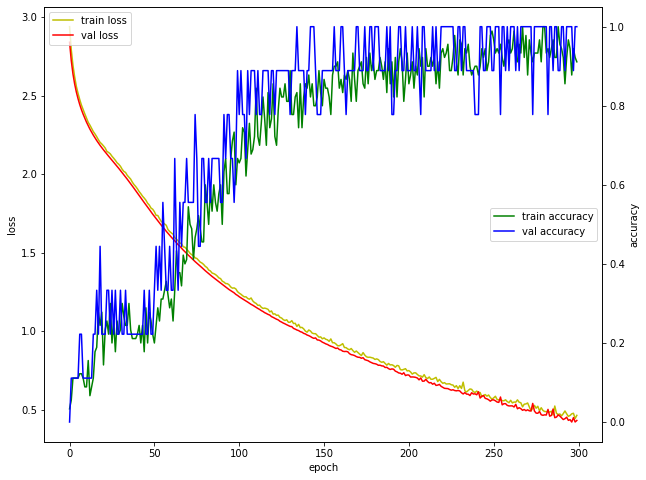

In [17]:
# 모델의 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label="val loss")

acc_ax = loss_ax.twinx() #loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [18]:
# 모델 평가하기
score = model.evaluate(X_val, Y_val, batch_size=1)

9/9 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 1.0000


In [19]:
score

[0.4313261806964874, 1.0]

In [21]:
print('평가된 loss :', score[0])
print('평가된 accuracy :', score[1]*100, '%')

평가된 loss : 0.4313261806964874
평가된 accuracy : 100.0 %


# 7. 모델 사용하기(모델을 이용해서 예측하기)

In [26]:
H = model.predict(np.array([2]))
H

array([[1.4321650e-14, 6.4732846e-12, 1.0131009e-01, 1.0697643e-12,
        8.0438948e-01, 4.2944061e-13, 9.2346348e-02, 8.1830566e-13,
        1.9530135e-03, 1.9671491e-14, 1.0292222e-06, 5.3273941e-14,
        2.1188044e-10, 4.8215780e-12, 2.7267869e-13, 2.4891190e-11,
        6.9480292e-19, 1.6912328e-12, 3.0623756e-26]], dtype=float32)

In [23]:
model.predict(np.array([2])).argmax()

4

In [29]:
H[0,H.argmax()] *100

80.4389476776123

# 7. 모델 저장하기  

In [30]:
model.save('model/3_deep_begin.h5')

## 저장된 모델 사용하기

In [2]:
from tensorflow.keras.models import load_model
model2 = load_model('model/3_deep_begin.h5')

In [5]:
model2.predict(np.array([2])).argmax()

4

In [6]:
model2.predict_classes(np.array([2]))

C:\Users\tjoeun707\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([4], dtype=int64)